In [1]:
import jax
import jax.numpy as jnp
import json
import os

import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In [2]:
# runs = range(10655899, 10655910)
# for run in runs:
#   with open(f"output/runs/{run}/metrics.json", "r") as f:
#       metrics = json.load(f)
#       plt.plot(metrics["our_regret"], label="Our Regret")
#       plt.plot(metrics["ts_regret"], label="TS Regret")
#       plt.legend()
#       plt.title(run)
#       plt.show()

In [2]:
worst_run_path = "output/runs/supralittoral_aventine"
unif_run_path = "output/runs/pertinacious_genome/"

## Interactive

In [5]:
from src.utils import get_policy_prior_from_run
from src.baselines import get_baselines
from src.eval import bayes_regret

In [6]:
unif_policy_fn, unif_prior_fn, conf = get_policy_prior_from_run(unif_run_path)

In [7]:
worst_policy_fn, worst_prior_fn, worst_conf = get_policy_prior_from_run(worst_run_path)

BernoulliTS: 6.712806701660156
ours: 5.932441711425781


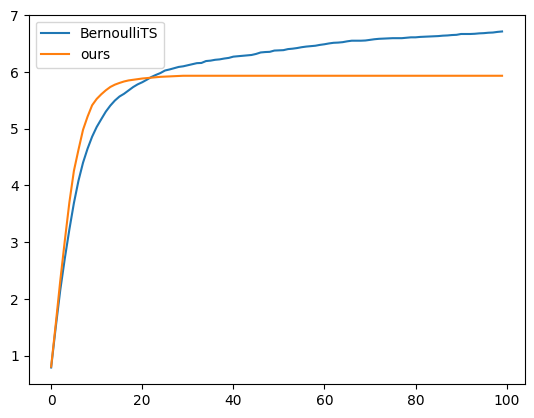

In [10]:
# evaluate on the learned prior
models = get_baselines(conf)
models["ours"] = worst_policy_fn

metrics = {}
rng = jax.random.PRNGKey(1234)

for name, model in models.items():
    rng, key = jax.random.split(rng)
    regret = bayes_regret(
        key,
        model,
        conf.prior.num_actions,
        conf.trainer.max_horizon,
        conf.trainer.monte_carlo_samples,
        worst_prior_fn,
    )
    metrics[name] = regret.tolist()

for name, metric in metrics.items():
  plt.plot(metric, label=name)
  print(f'{name}: {metric[-1]}')
plt.legend()
plt.title("worst-case algo on worst-case prior")
plt.show()

BernoulliTS: 8.011962890625
ours: 9.694124221801758


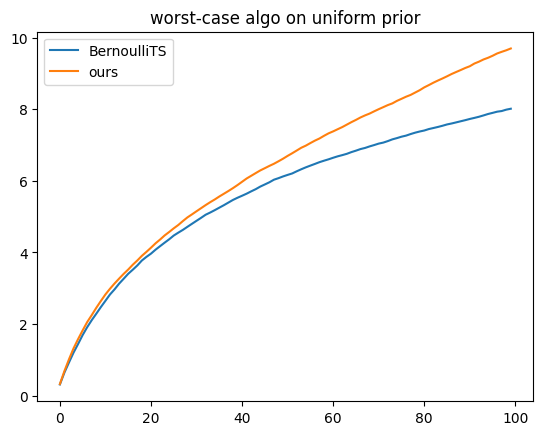

In [11]:
# evaluate on the learned prior
models = get_baselines(conf)
models["ours"] = worst_policy_fn

metrics = {}
rng = jax.random.PRNGKey(1234)

for name, model in models.items():
    rng, key = jax.random.split(rng)
    regret = bayes_regret(
        key,
        model,
        conf.prior.num_actions,
        conf.trainer.max_horizon,
        conf.trainer.monte_carlo_samples,
        unif_prior_fn,
    )
    metrics[name] = regret.tolist()

for name, metric in metrics.items():
  plt.plot(metric, label=name)
  print(f'{name}: {metric[-1]}')
plt.legend()
plt.title("worst-case algo on uniform prior")
plt.show()

BernoulliTS: 8.011962890625
ours: 6.435322284698486


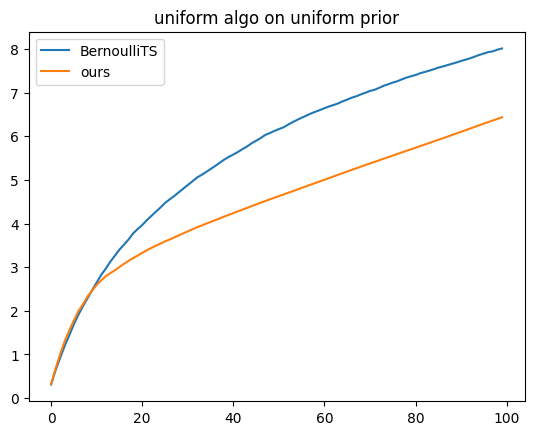

In [12]:
# evaluate on the learned prior
models = get_baselines(conf)
models["ours"] = unif_policy_fn

metrics = {}
rng = jax.random.PRNGKey(1234)

for name, model in models.items():
    rng, key = jax.random.split(rng)
    regret = bayes_regret(
        key,
        model,
        conf.prior.num_actions,
        conf.trainer.max_horizon,
        conf.trainer.monte_carlo_samples,
        unif_prior_fn,
    )
    metrics[name] = regret.tolist()

for name, metric in metrics.items():
  plt.plot(metric, label=name)
  print(f'{name}: {metric[-1]}')
plt.legend()
plt.title("uniform algo on uniform prior")
plt.show()

BernoulliTS: 6.712806701660156
ours: 5.932441711425781


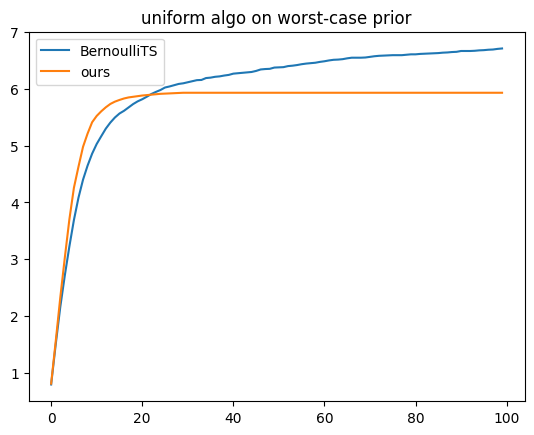

In [13]:
# evaluate on the learned prior
models = get_baselines(conf)
models["ours"] = unif_policy_fn

metrics = {}
rng = jax.random.PRNGKey(1234)

for name, model in models.items():
    rng, key = jax.random.split(rng)
    regret = bayes_regret(
        key,
        model,
        conf.prior.num_actions,
        conf.trainer.max_horizon,
        conf.trainer.monte_carlo_samples,
        worst_prior_fn,
    )
    metrics[name] = regret.tolist()

for name, metric in metrics.items():
  plt.plot(metric, label=name)
  print(f'{name}: {metric[-1]}')
plt.legend()
plt.title("uniform algo on worst-case prior")
plt.show()